# DATA MINING WORKGROUP

## Problem Statement

Kickstarter is a community of more than 10 million people comprising of creative, tech enthusiasts who help in bringing creative project to life. Till now, more than $3 billion dollars have been contributed by the members in fueling creative projects. The projects can be literally anything – a device, a game, an app, a film etc.

Kickstarter works on all or nothing basis i.e if a project doesn’t meet it goal, the project owner gets nothing.

Recently, Kickstarter released its public data repository to allow researchers and enthusiasts like us to help them solve a problem. Will a project get fully funded?

#### TASK DESCRIPTION

Our task is to predict if a kickstarter project will be succesful or not

## Introduction

> All the packages needed for this exercise are imported in the code below

In [1]:
#Loading all Packages
print("==================== BLOCK 1 Started! ======================")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
r_state=42
from sklearn.metrics import roc_curve,auc
import time
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import matplotlib.colors as colors
from sklearn.preprocessing import scale
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

print("==================== Packages Loaded  ======================")

==================== BLOCK 1 Started! ======================
==================== Packages Loaded  ======================


# The dataset

Variable Description from the Kaggle website

project_id: unique id of project

name: name of the project

desc: description of project

goal: the goal (amount) required for the project

keywords: keywords which describe project

disable communication: whether the project authors has disabled communication option with people donating to the project

country: country of project author

currency: currency in which goal (amount) is required

deadline: till this date the goal must be achieved (in unix timeformat)

state_changed_at: at this time the project status changed. Status could be successful, failed, suspended, cancelled etc. (in unix timeformat)

created_at: at this time the project was posted on the website(in unix timeformat)

launched_at: at this time the project went live on the website(in unix timeformat)

backers_count: number of people who backed the project

final_status: whether the project got successfully funded (target variable – 1,0)

### Importing the taining set

In [2]:
df = pd.read_csv(r'C:\Users\casco\OneDrive\Documenti\BBS\Data Mining\Project\kickstarter.csv',
                 sep = ',')
df.head()

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,1241333999,1241334017,1240600507,1240602723,3,1
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,1242429000,1242432018,1240960224,1240975592,2,0
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,USD,1243027560,1243027818,1242163613,1242164398,0,0
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,USD,1243555740,1243556121,1240963795,1240966730,18,1
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,USD,1243769880,1243770317,1241177914,1241180541,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108129 entries, 0 to 108128
Data columns (total 14 columns):
project_id               108129 non-null object
name                     108128 non-null object
desc                     108121 non-null object
goal                     108129 non-null float64
keywords                 108129 non-null object
disable_communication    108129 non-null bool
country                  108129 non-null object
currency                 108129 non-null object
deadline                 108129 non-null int64
state_changed_at         108129 non-null int64
created_at               108129 non-null int64
launched_at              108129 non-null int64
backers_count            108129 non-null int64
final_status             108129 non-null int64
dtypes: bool(1), float64(1), int64(6), object(6)
memory usage: 10.8+ MB


## PREPROCESSING DATA

> #### Creating new dimensions for a more correct prediction

In [4]:
df["diff_launch_deadliane"]= df.deadline-df.launched_at
df["diff_creation_launch"]= df.launched_at-df.created_at
df["diff_creation_deadline"]= df.deadline-df.created_at
df["diff_deadliane_statechanged"]= df.deadline-df.launched_at

In [5]:
df["country"] = df["country"].astype('category')
df["country_cat"] = df["country"].cat.codes
df["currency"] = df["currency"].astype('category')
df["currency_cat"] = df["currency"].cat.codes
df.head()

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status,diff_launch_deadliane,diff_creation_launch,diff_creation_deadline,diff_deadliane_statechanged,country_cat,currency_cat
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,1241333999,1241334017,1240600507,1240602723,3,1,731276,2216,733492,731276,10,8
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,1242429000,1242432018,1240960224,1240975592,2,0,1453408,15368,1468776,1453408,10,8
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,USD,1243027560,1243027818,1242163613,1242164398,0,0,863162,785,863947,863162,10,8
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,USD,1243555740,1243556121,1240963795,1240966730,18,1,2589010,2935,2591945,2589010,10,8
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,USD,1243769880,1243770317,1241177914,1241180541,1,0,2589339,2627,2591966,2589339,10,8


### Dropping out unuseful columns

In [6]:
X = df.drop(["project_id","name","desc","keywords","country","currency","final_status"], axis = 1)
y = df.drop(df.columns[0:13], axis =1)
y = y.drop(y.columns[1:], axis =1)
X.head()

,goal,disable_communication,deadline,state_changed_at,created_at,launched_at,backers_count,diff_launch_deadliane,diff_creation_launch,diff_creation_deadline,diff_deadliane_statechanged,country_cat,currency_cat
0,20.0,False,1241333999,1241334017,1240600507,1240602723,3,731276,2216,733492,731276,10,8
1,300.0,False,1242429000,1242432018,1240960224,1240975592,2,1453408,15368,1468776,1453408,10,8
2,30.0,False,1243027560,1243027818,1242163613,1242164398,0,863162,785,863947,863162,10,8
3,500.0,False,1243555740,1243556121,1240963795,1240966730,18,2589010,2935,2591945,2589010,10,8
4,2000.0,False,1243769880,1243770317,1241177914,1241180541,1,2589339,2627,2591966,2589339,10,8


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108129 entries, 0 to 108128
Data columns (total 13 columns):
goal                           108129 non-null float64
disable_communication          108129 non-null bool
deadline                       108129 non-null int64
state_changed_at               108129 non-null int64
created_at                     108129 non-null int64
launched_at                    108129 non-null int64
backers_count                  108129 non-null int64
diff_launch_deadliane          108129 non-null int64
diff_creation_launch           108129 non-null int64
diff_creation_deadline         108129 non-null int64
diff_deadliane_statechanged    108129 non-null int64
country_cat                    108129 non-null int8
currency_cat                   108129 non-null int8
dtypes: bool(1), float64(1), int64(9), int8(2)
memory usage: 8.6 MB


In [8]:
y.head()

,final_status
0,1
1,0
2,0
3,1
4,0


In [9]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108129 entries, 0 to 108128
Data columns (total 1 columns):
final_status    108129 non-null int64
dtypes: int64(1)
memory usage: 844.8 KB


### Splitting the dataset into train (75%) and test set (25%)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= r_state)# default Train 0.75- Test 0.25
print("There are {} samples in the training dataset".format(X_train.shape[0]))
print("There are {} samples in the testing dataset".format(X_test.shape[0]))
print("Each sample has {} features".format(X_train.shape[1]))

There are 81096 samples in the training dataset
There are 27033 samples in the testing dataset
Each sample has 13 features


In [11]:
y = y.iloc[:,0].values
y_train = y_train.iloc[:,0].values
y_test = y_test.iloc[:,0].values

## DECISION TREE

### Running a standard Decision Tree as baseline

In [12]:
estimator = tree.DecisionTreeClassifier(criterion="entropy", min_impurity_decrease=0.1, random_state = r_state)
estimator.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.1, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

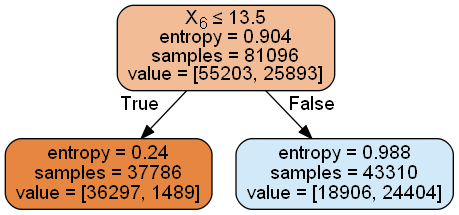

In [13]:
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [14]:
scores = cross_val_score(estimator, X, y, scoring='accuracy', cv = 10)
average_accuracy = np.mean(scores) * 100
print("The average accuracy computed with Cross Validation is {0:.2f}%".format(average_accuracy))

The average accuracy computed with Cross Validation is 75.03%


### Using elbow method to find the optimal value for minimum impurity decrease

In [15]:
avg_scores = []
parameter_values = np.arange(0,0.001, 0.0001)
for mid in parameter_values:
    estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state = 42,
                                            min_impurity_decrease = mid)
    estimator.fit(X_train, y_train)
    y_predicted = estimator.predict(X_test)
    scores = np.mean(y_test == y_predicted) * 100
    avg_scores.append(round(np.mean(scores),4))

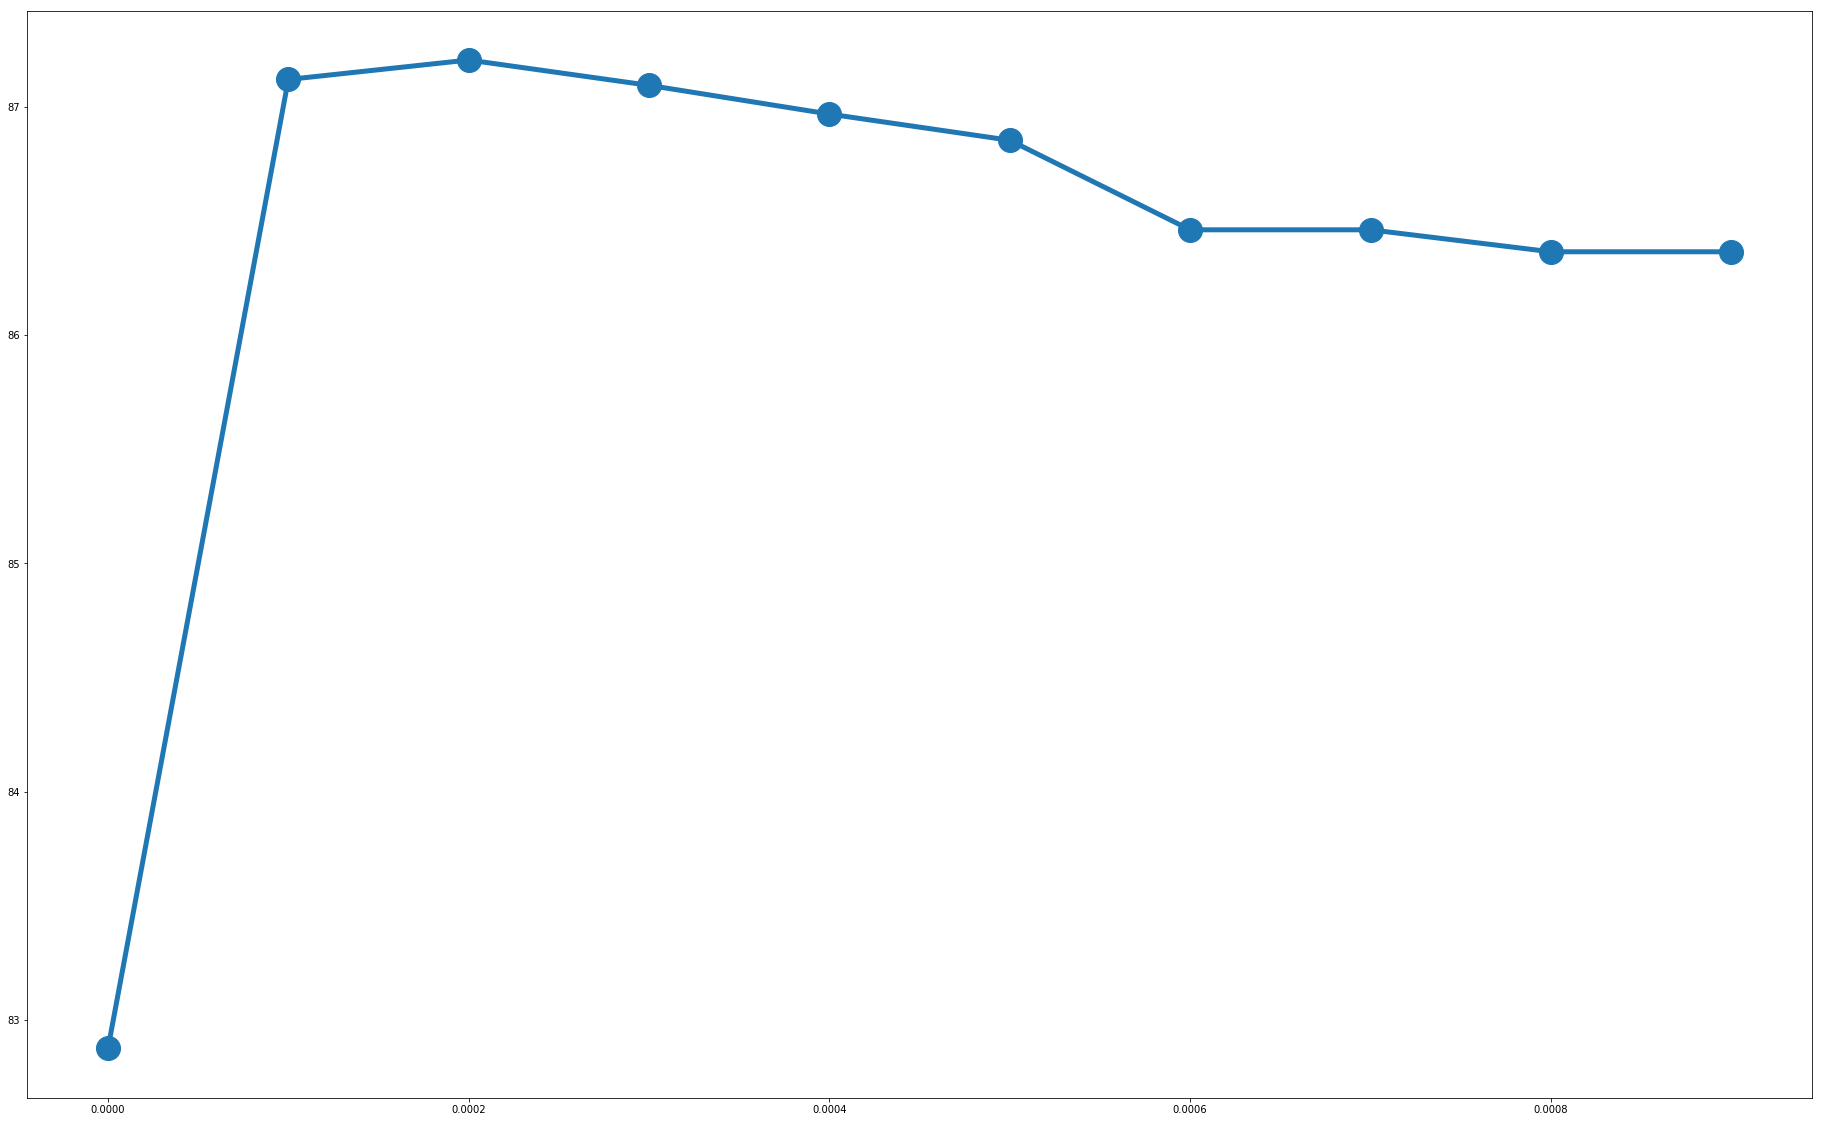

In [16]:
plt.figure(figsize=(32,20))
plt.plot(parameter_values, avg_scores, '-o', linewidth=5, markersize=24)
plt.show()

In [17]:
print("The top accuracy is {0:.1f}%".format(avg_scores[np.argmax(avg_scores)]))
print("Obtained with min_impurity_decrease = {0:.4f}".format(parameter_values[np.argmax(avg_scores)]))

The top accuracy is 87.2%
Obtained with min_impurity_decrease = 0.0002


## Using cross-validation to compute the score on the entire data set

In [18]:
scores = cross_val_score(estimator, X, y, scoring='accuracy', cv = 10)
average_accuracy = np.mean(scores) * 100
print("The average accuracy computed with Cross Validation is {0:.1f}%".format(average_accuracy))

The average accuracy computed with Cross Validation is 86.8%


### Visualizing the final Tree

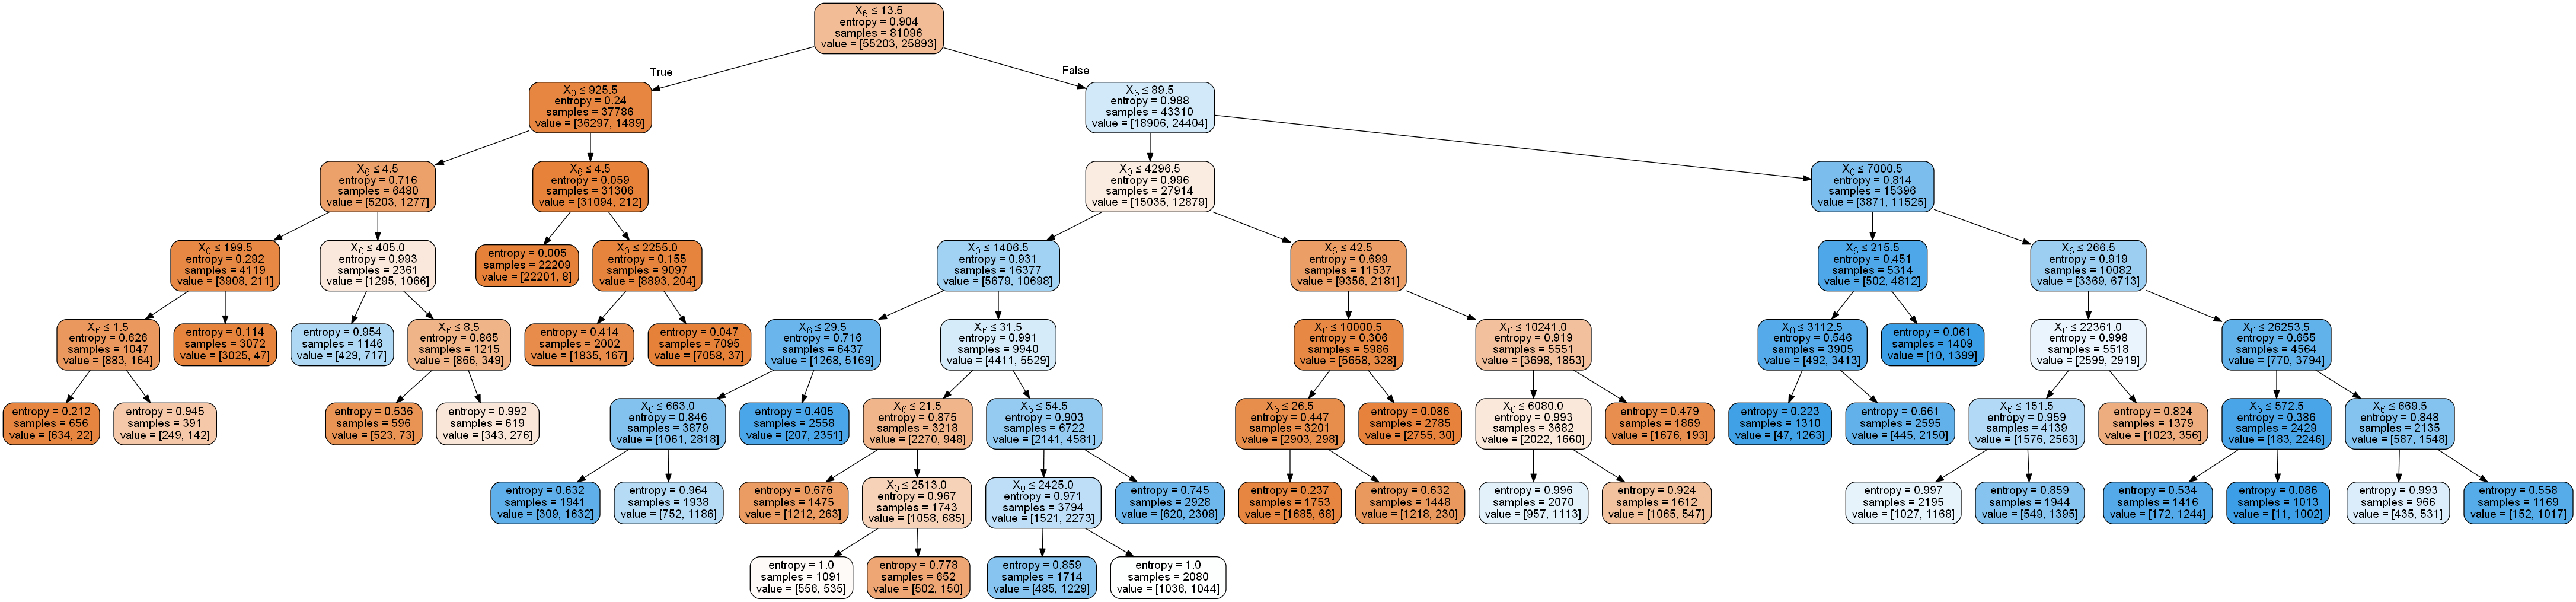

In [19]:
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## SUPPORT VECTOR MACHINE

Due to a computational time problem (tried to run the svm for 24 hours with no result), we decided to sample the dataset

In [20]:
df.shape

(108129, 20)

In [21]:
df_s = df.sample(frac=0.02, random_state= r_state)

In [22]:
df_s.shape

(2163, 20)

In [23]:
X_s = df_s.drop(["project_id","name","desc","keywords","country","currency","final_status"], axis = 1)
y_s = df_s.drop(df_s.columns[0:13], axis =1)
y_s = y_s.drop(y_s.columns[1:], axis =1)
X_s.head()

,goal,disable_communication,deadline,state_changed_at,created_at,launched_at,backers_count,diff_launch_deadliane,diff_creation_launch,diff_creation_deadline,diff_deadliane_statechanged,country_cat,currency_cat
31731,5000.0,False,1355302981,1355302981,1350499952,1352710981,951,2592000,2211029,4803029,2592000,4,4
34183,935.0,False,1360569540,1360569540,1360031704,1360186876,7,382664,155172,537836,382664,10,8
71977,20000.0,False,1409962350,1407980395,1404161166,1404778350,1,5184000,617184,5801184,5184000,10,8
28759,25000.0,False,1349679956,1349679956,1340811269,1346223956,125,3456000,5412687,8868687,3456000,10,8
50434,14000.0,False,1386863773,1386863773,1381843086,1384271773,1930,2592000,2428687,5020687,2592000,4,4


In [24]:
print(X_s.shape)
print(y_s.shape)

(2163, 13)
(2163, 1)


In [25]:
#Scaling the dataset
X_s = scale(X_s)
print(np.mean(X_s))
print(np.std(X_s))

4.29575251891e-18
1.0


In [26]:
#Splitting the dataset
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, test_size=0.25, random_state=r_state)
y_s = y_s.iloc[:,0].values
y_s_train = y_s_train.iloc[:,0].values
y_s_test = y_s_test.iloc[:,0].values

Decided to use a linear kernel, tuning c and gamma parameters

Top accuracy: 0.7909987669543773
Tuned model parameters: {'C': 50, 'gamma': 0.005}


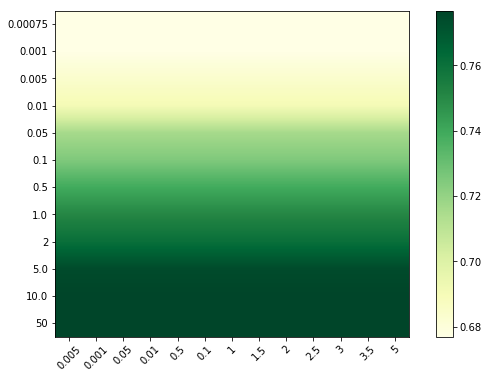

Duration: --- 7.978832058111826 Minutes ---


In [27]:
start_time = time.time()

parameters = {"C":[0.00075,0.001,0.005,0.01,0.05,0.1,0.5,1.0,2,5.0,10.0,50],
             "gamma":[0.005,0.001,0.05,0.01,0.5,0.1,1,1.5,2,2.5,3,3.5,5]}
cv=GridSearchCV(svm.SVC(kernel='linear'), parameters, cv=10)
cv.fit(X_s_train, y_s_train)

print("Top accuracy: {}".format(cv.best_score_))
print("Tuned model parameters: {}".format(cv.best_params_))

#let's print a graph with all the tested combination of parameters C and gamma
scores = cv.cv_results_['mean_test_score'].reshape(len(parameters["C"]),len(parameters["gamma"]))
f, ax = plt.subplots(1, 1, figsize=(10,6))
plt.imshow(scores, interpolation='bilinear', cmap=plt.cm.YlGn, vmin=np.percentile(scores,10), vmax=np.percentile(scores,90))
plt.xticks(np.arange(len(parameters["gamma"])), parameters["gamma"], rotation=45)
plt.yticks(np.arange(len(parameters["C"])), parameters["C"])
plt.colorbar()
plt.show()

print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

### Roc curve for evaluation

ROC AUC: 0.867


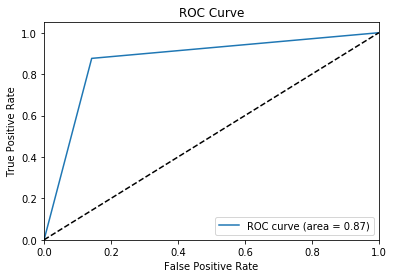

In [28]:
#Roc curve for the decision tree
y_pred_prob = estimator.predict(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.3f' % roc_auc)
 

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

ROC AUC: 0.699


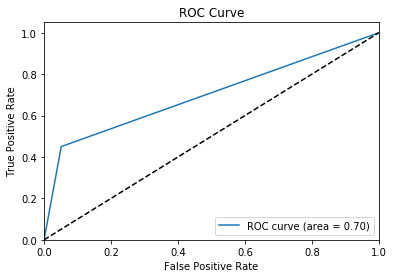

In [29]:
#Roc curve for the svm
y_pred_prob = cv.predict(X_s_test)
fpr, tpr, threshold = roc_curve(y_s_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.3f' % roc_auc)
 

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Conclusions

We chose a database related to project funding. This data shows if the projects have been funded or not. We wanted to know if it's possible to predict if a prospective project is going to be funded or not. The methods here show that it is possible to do it achieveing up to an 87,2% of accuracy. The methods used were decision tree and support vector machine. The first had better outcomes thatn the second. Besides it is chepaer in terms of time of computation, thus more efficient. 

Below are presented the main conclusions of this work.

| Classifier | Performance |
| ------ | ------ |
| Baseline Decision Tree | 75.03% |
| Parametrized Decision Tree | 87.20% |
| Parametrized Support Vector Machine | 79.10% |